<a href="https://colab.research.google.com/github/Ankurgupta2927/Ankurgupta2927/blob/main/DeepFake_Image_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The image /content/download.jpg is predicted to be REAL.


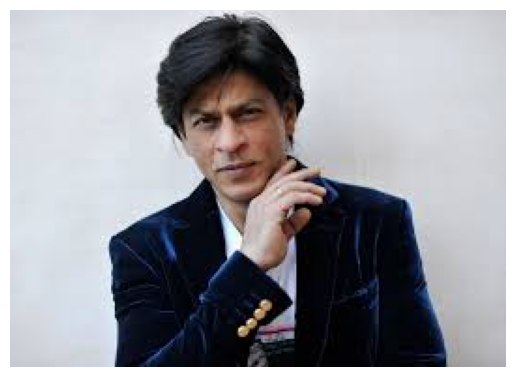

In [4]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('/content/deepfake_detection_model.h5')

# Function to load and preprocess an image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to 224x224
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize image
    return img_array

# Path to the image you want to test
img_path = '/content/download.jpg'

# Preprocess the image
img_array = preprocess_image(img_path)

# Make a prediction
prediction = model.predict(img_array)

# Convert the prediction to binary (0 for real, 1 for fake)
predicted_class = np.where(prediction > 0.5, 1, 0)

# Print the result
if predicted_class == 0:
    print(f'The image {img_path} is predicted to be REAL.')
else:
    print(f'The image {img_path} is predicted to be FAKE.')

# Display the image
img = image.load_img(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()
